In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
aus = pd.read_csv('/content/drive/MyDrive/faus.csv') # These are the csv files of corresponding countries tweets and their predicted sentiments
ind = pd.read_csv('/content/drive/MyDrive/Find.csv')
indo = pd.read_csv('/content/drive/MyDrive/Indo.csv')
jap = pd.read_csv('/content/drive/MyDrive/Jap.csv')
br = pd.read_csv('/content/drive/MyDrive/Br.csv')

In [ ]:
aus['country'] = 'Australia'
ind['country'] = 'India'
indo['country'] = 'Indonesia'
jap['country'] = 'Japan'
br['country'] = 'Brazil'

In [ ]:
jap.columns


Index(['Unnamed: 0', 'Tweet', 'text', 'date', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial',
       'Official report', 'Surprise', 'Joking', 'country'],
      dtype='object')

In [ ]:
ind = ind.drop(columns=['Unnamed: 0'],axis=1)
indo = indo.drop(columns=['Unnamed: 0'],axis=1)
aus = aus.drop(columns=['Unnamed: 0'],axis=1)
jap = jap.drop(columns=['Unnamed: 0'],axis=1)
br = br.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
df1 = pd.concat([aus,ind], axis=0)
df2 = pd.concat([df1,indo], axis=0)
df3 = pd.concat([df2,br], axis=0)
data = pd.concat([df3,jap], axis=0)

In [ ]:
data = data.reset_index()
data

,index,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country
0,0,i just cannot imagine selfish antivaxxers r...,@Gr3yJ3d1 @420_BTC @newscomauHQ I just can’t i...,Wed Dec 08 05:13:37 +0000 2021,0,0,0,0,0,0,1,0,0,0,1,Australia
1,1,rt oh wow so antivaxxers in melbourne are pr...,RT @krunchymoses: Oh wow. So antivaxxers in Me...,Wed Dec 08 05:27:06 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
2,2,i think boosters at 3 months might be better f...,I think boosters at 3 months might be better f...,Wed Dec 08 05:35:48 +0000 2021,0,0,0,0,1,0,1,0,0,1,0,Australia
3,3,psa this is your regular reminder that anyth...,#PSA: This is your regular reminder that anyth...,Wed Dec 08 05:37:09 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
4,4,rt canada’s antimaskers antivaxxers are not a...,RT @MatthewSloly: Canada’s antimaskers/antivax...,Wed Dec 08 05:48:35 +0000 2021,0,0,0,0,0,0,1,1,0,0,0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988142,118707,rt in 2021 is calling for a global effort t...,"RT @sanofipasteur: In 2021, @WHO is calling fo...",1353967591291834368,1,0,0,0,0,0,0,0,1,0,0,Japan
988143,118708,rt dyk respiratory syncytial virus or rsv ...,RT @sanofipasteur: #DYK Respiratory syncytial ...,1313484412366053377,0,0,0,0,0,0,0,0,1,0,0,Japan
988144,118709,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan
988145,118710,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan


In [ ]:
data = data.drop(columns=['index'],axis=1)
data

,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country
0,i just cannot imagine selfish antivaxxers r...,@Gr3yJ3d1 @420_BTC @newscomauHQ I just can’t i...,Wed Dec 08 05:13:37 +0000 2021,0,0,0,0,0,0,1,0,0,0,1,Australia
1,rt oh wow so antivaxxers in melbourne are pr...,RT @krunchymoses: Oh wow. So antivaxxers in Me...,Wed Dec 08 05:27:06 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
2,i think boosters at 3 months might be better f...,I think boosters at 3 months might be better f...,Wed Dec 08 05:35:48 +0000 2021,0,0,0,0,1,0,1,0,0,1,0,Australia
3,psa this is your regular reminder that anyth...,#PSA: This is your regular reminder that anyth...,Wed Dec 08 05:37:09 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia
4,rt canada’s antimaskers antivaxxers are not a...,RT @MatthewSloly: Canada’s antimaskers/antivax...,Wed Dec 08 05:48:35 +0000 2021,0,0,0,0,0,0,1,1,0,0,0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988142,rt in 2021 is calling for a global effort t...,"RT @sanofipasteur: In 2021, @WHO is calling fo...",1353967591291834368,1,0,0,0,0,0,0,0,1,0,0,Japan
988143,rt dyk respiratory syncytial virus or rsv ...,RT @sanofipasteur: #DYK Respiratory syncytial ...,1313484412366053377,0,0,0,0,0,0,0,0,1,0,0,Japan
988144,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan
988145,rt during orldimmunizationweek our head of g...,RT @sanofipasteur: During #WorldImmunizationWe...,Mon Apr 27 10:27:01 +0000 2020,1,1,0,0,0,0,0,0,0,0,0,Japan


In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking', 'country'],
      dtype='object')

**TextBlob Poalrity score**

In [ ]:
from textblob import TextBlob
#Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

df['TextBlob_Polarity'] = df['Tweet'].apply(getPolarity)

**Distribution plot of TextBlob polarity score**

<ipython-input-17-2893c5c00d83>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TextBlob_Polarity'], hist=True)


<Axes: xlabel='TextBlob_Polarity', ylabel='Density'>

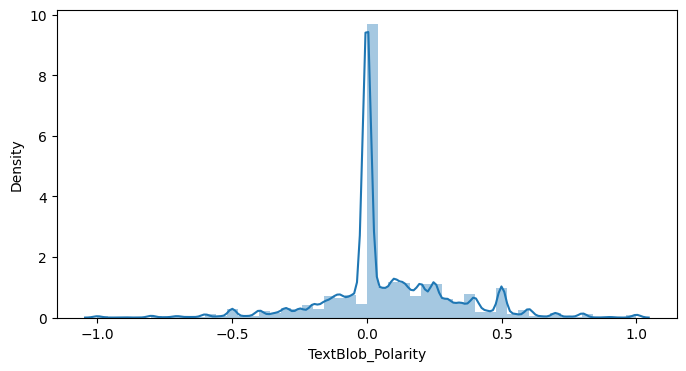

In [ ]:
plt.figure(figsize = (8, 4))
sns.distplot(df['TextBlob_Polarity'], hist=True)

**plot for analyzing sentiment labels variation over months**

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
data = data.dropna(subset=['date'])
data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
data['month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

In [ ]:
dates = data['month'].unique()
dates

array(['2021-12', '2022-01', '2021-11', '2021-09', '2021-08', '2021-10',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2020-07', '2020-09', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-08', '2020-12', '2020-10', '2021-01'], dtype=object)

In [ ]:
labels = ['Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking']

In [ ]:
Japan_data = pd.DataFrame(columns=labels)

for date in dates:
    counts = []
    for label in labels:
        count = data[(data['country'] == 'Japan') & (data[label] == 1) & (data['month'] == date)][label].count()
        counts.append(count)
    Japan_data.loc[date] = counts



In [ ]:
India_data = pd.DataFrame(columns=labels)

for date in dates:
    counts = []
    for label in labels:
        count = data[(data['country'] == 'India') & (data[label] == 1) & (data['month'] == date)][label].count()
        counts.append(count)
    India_data.loc[date] = counts

In [ ]:
Australia_data = pd.DataFrame(columns=labels)

for date in dates:
    counts = []
    for label in labels:
        count = data[(data['country'] == 'Australia') & (data[label] == 1) & (data['month'] == date)][label].count()
        counts.append(count)
    Australia_data.loc[date] = counts

In [ ]:
Brazil_data = pd.DataFrame(columns=labels)

for date in dates:
    counts = []
    for label in labels:
        count = data[(data['country'] == 'Brazil') & (data[label] == 1) & (data['month'] == date)][label].count()
        counts.append(count)
    Brazil_data.loc[date] = counts

In [ ]:
Indonesia_data = pd.DataFrame(columns=labels)

for date in dates:
    counts = []
    for label in labels:
        count = data[(data['country'] == 'Indonesia') & (data[label] == 1) & (data['month'] == date)][label].count()
        counts.append(count)
    Indonesia_data.loc[date] = counts

In [ ]:
Brazil_data.sort_index(inplace=True)
Japan_data.sort_index(inplace=True)
Indonesia_data.sort_index(inplace=True)
India_data.sort_index(inplace=True)
Australia_data.sort_index(inplace=True)

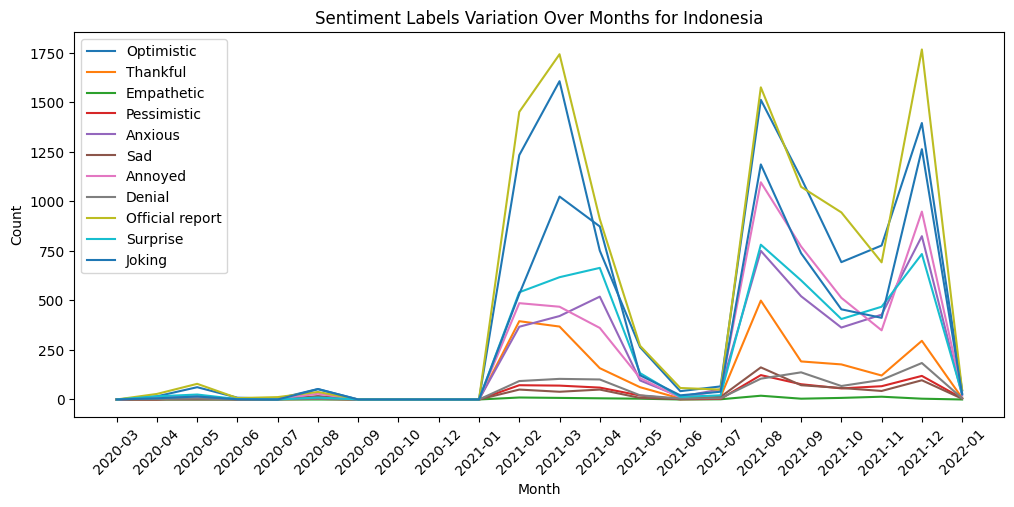

In [ ]:

# Create the plot
plt.figure(figsize=(12, 5))
for label in labels:
    plt.plot(Indonesia_data.index, Indonesia_data[label], label=label) # can be done with rest of the countries data also

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sentiment Labels Variation Over Months for Indonesia')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Plot to get Number of vaccine related per country**

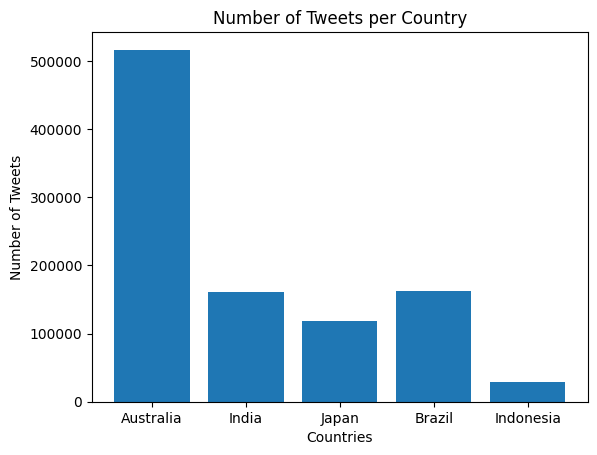

In [ ]:
countries = ['Australia', 'India', 'Japan', 'Brazil', 'Indonesia']
tweet_counts = [516559,160906,118712,162751,29219]   # Tweet counts of vaccine related tweets

# Plotting the bar graph
plt.bar(countries, tweet_counts)

# Customizing the graph
plt.xlabel('Countries')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Country')

# Displaying the graph
plt.show()

**Plots to get variation of sentiment counts over months**

In [ ]:
def get_lists1(data):
    emotions = data.columns[3:14]
    #data = data[data['country']=='India']
    months = ["March", "April", "May", "June", "July", "August", "September","October","November"]
    march = [data[data['month'] == '2020-03'][x].sum() for x in emotions]
    april = [data[data['month'] == '2020-04'][x].sum() for x in emotions]
    may = [data[data['month'] == '2020-05'][x].sum() for x in emotions]
    june = [data[data['month'] == '2020-06'][x].sum() for x in emotions]
    july = [data[data['month'] == '2020-07'][x].sum() for x in emotions]
    august = [data[data['month'] == '2020-08'][x].sum() for x in emotions]
    september = [data[data['month'] == '2020-09'][x].sum() for x in emotions]
    october = [data[data['month'] == '2020-10'][x].sum() for x in emotions]
    november = [data[data['month'] == '2020-11'][x].sum() for x in emotions]
    # december = [data[data['month'] == '2020-12'][x].sum() for x in emotions]
    # january = [data[data['month'] == '2021-01'][x].sum() for x in emotions]
    # february = [data[data['month'] == '2021-02'][x].sum() for x in emotions]


    return march, april, may, june, july, august, september, october, november


In [ ]:
def get_lists2(data):
    emotions = data.columns[3:14]
    #data = data[data['country']=='Japan']
    months = ["February","March", "April", "May", "June", "July"]
    #december = [data[data['month'] == '2020-12'][x].sum() for x in emotions]
    #january = [data[data['month'] == '2021-01'][x].sum() for x in emotions]
    february = [data[data['month'] == '2021-02'][x].sum() for x in emotions]
    march = [data[data['month'] == '2021-03'][x].sum() for x in emotions]
    april = [data[data['month'] == '2021-04'][x].sum() for x in emotions]
    may = [data[data['month'] == '2021-05'][x].sum() for x in emotions]
    june = [data[data['month'] == '2021-06'][x].sum() for x in emotions]
    july = [data[data['month'] == '2021-07'][x].sum() for x in emotions]

    return february, march, april, may, june, july

In [ ]:
def get_lists3(data):
    emotions = data.columns[3:14]
    #data = data[data['country']=='Japan']
    months = ["August", "September","October","November","December","January"]

    august = [data[data['month'] == '2021-08'][x].sum() for x in emotions]
    september = [data[data['month'] == '2021-09'][x].sum() for x in emotions]
    october = [data[data['month'] == '2021-10'][x].sum() for x in emotions]
    november = [data[data['month'] == '2021-11'][x].sum() for x in emotions]
    december = [data[data['month'] == '2021-12'][x].sum() for x in emotions]
    january = [data[data['month'] == '2022-01'][x].sum() for x in emotions]

    return august, september, october, november, december, january

In [ ]:
def monthwise3(august, september, october, november, december, january):

    df = pd.DataFrame({

                    'August' : {'Optimistic' : august[0],
                                'Thankful' : august[1],
                                'Empathetic' : august[2],
                                'Pessimistic' : august[3],
                                'Anxious' : august[4],
                                'Sad' : august[5],
                                'Annoyed' : august[6],
                                'Denial' : august[7],
                                'Official report' : august[8],
                                'Surprise' : august[9],
                                'Joking' : august[10]},

                        'September' : {'Optimistic' : september[0],
                                'Thankful' : september[1],
                                'Empathetic' : september[2],
                                'Pessimistic' : september[3],
                                'Anxious' : september[4],
                                'Sad' : september[5],
                                'Annoyed' : september[6],
                                'Denial' : september[7],
                                'Official report' : september[8],
                                'Surprise' : september[9],
                                'Joking' : september[10]},

                       'October' : {'Optimistic' : october[0],
                                'Thankful' : october[1],
                                'Empathetic' : october[2],
                                'Pessimistic' : october[3],
                                'Anxious' : october[4],
                                'Sad' : october[5],
                                'Annoyed' : october[6],
                                'Denial' : october[7],
                                'Official report' : october[8],
                                'Surprise' : october[9],
                                'Joking' : october[10]},


                       'November' : {'Optimistic' : november[0],
                                'Thankful' : november[1],
                                'Empathetic' : november[2],
                                'Pessimistic' : november[3],
                                'Anxious' : november[4],
                                'Sad' : november[5],
                                'Annoyed' : november[6],
                                'Denial' : november[7],
                                'Official report' : november[8],
                                'Surprise' : november[9],
                                'Joking' : november[10]},

                       'December' : {'Optimistic' : december[0],
                                'Thankful' : december[1],
                                'Empathetic' : december[2],
                                'Pessimistic' : december[3],
                                'Anxious' : december[4],
                                'Sad' : december[5],
                                'Annoyed' : december[6],
                                'Denial' : december[7],
                                'Official report' : december[8],
                                'Surprise' : december[9],
                                'Joking' : december[10]},

                       'January' : {'Optimistic' : january[0],
                                'Thankful' : january[1],
                                'Empathetic' : january[2],
                                'Pessimistic' : january[3],
                                'Anxious' : january[4],
                                'Sad' : january[5],
                                'Annoyed' : january[6],
                                'Denial' : january[7],
                                'Official report' : january[8],
                                'Surprise' : january[9],
                                'Joking' : january[10]},


                       })
    return df

In [ ]:
def monthwise1(march, april, may, june, july, august, september, october, november):

    df = pd.DataFrame({'Mar' : {'Optimistic' : march[0],
                                'Thankful' : march[1],
                                'Empathetic' : march[2],
                                'Pessimistic' : march[3],
                                'Anxious' : march[4],
                                'Sad' : march[5],
                                'Annoyed' : march[6],
                                'Denial' : march[7],
                                'Official report' : march[8],
                                'Surprise' : march[9],
                                'Joking' : march[10]},

                    'Apr' : {'Optimistic' : april[0],
                                'Thankful' : april[1],
                                'Empathetic' : april[2],
                                'Pessimistic' : april[3],
                                'Anxious' : april[4],
                                'Sad' : april[5],
                                'Annoyed' : april[6],
                                'Denial' : april[7],
                                'Official report' : april[8],
                                'Surprise' : april[9],
                                'Joking' : april[10]},
                        'May' : {'Optimistic' : may[0],
                                'Thankful' : may[1],
                                'Empathetic' : may[2],
                                'Pessimistic' : may[3],
                                'Anxious' : may[4],
                                'Sad' : may[5],
                                'Annoyed' : may[6],
                                'Denial' : may[7],
                                'Official report' : may[8],
                                'Surprise' : may[9],
                                'Joking' : may[10]},

                    'June' : {'Optimistic' : june[0],
                                'Thankful' : june[1],
                                'Empathetic' : june[2],
                                'Pessimistic' : june[3],
                                'Anxious' : june[4],
                                'Sad' : june[5],
                                'Annoyed' : june[6],
                                'Denial' : june[7],
                                'Official report' : june[8],
                                'Surprise' : june[9],
                                'Joking' : june[10]},

                        'July' : {'Optimistic' : july[0],
                                'Thankful' : july[1],
                                'Empathetic' : july[2],
                                'Pessimistic' : july[3],
                                'Anxious' : july[4],
                                'Sad' : july[5],
                                'Annoyed' : july[6],
                                'Denial' : july[7],
                                'Official report' : july[8],
                                'Surprise' : july[9],
                                'Joking' : july[10]},

                    'August' : {'Optimistic' : august[0],
                                'Thankful' : august[1],
                                'Empathetic' : august[2],
                                'Pessimistic' : august[3],
                                'Anxious' : august[4],
                                'Sad' : august[5],
                                'Annoyed' : august[6],
                                'Denial' : august[7],
                                'Official report' : august[8],
                                'Surprise' : august[9],
                                'Joking' : august[10]},

                        'September' : {'Optimistic' : september[0],
                                'Thankful' : september[1],
                                'Empathetic' : september[2],
                                'Pessimistic' : september[3],
                                'Anxious' : september[4],
                                'Sad' : september[5],
                                'Annoyed' : september[6],
                                'Denial' : september[7],
                                'Official report' : september[8],
                                'Surprise' : september[9],
                                'Joking' : september[10]},

                       'October' : {'Optimistic' : october[0],
                                'Thankful' : october[1],
                                'Empathetic' : october[2],
                                'Pessimistic' : october[3],
                                'Anxious' : october[4],
                                'Sad' : october[5],
                                'Annoyed' : october[6],
                                'Denial' : october[7],
                                'Official report' : october[8],
                                'Surprise' : october[9],
                                'Joking' : october[10]},


                       'November' : {'Optimistic' : november[0],
                                'Thankful' : november[1],
                                'Empathetic' : november[2],
                                'Pessimistic' : november[3],
                                'Anxious' : november[4],
                                'Sad' : november[5],
                                'Annoyed' : november[6],
                                'Denial' : november[7],
                                'Official report' : november[8],
                                'Surprise' : november[9],
                                'Joking' : november[10]},


                       })
    return df

In [ ]:
def monthwise2( february, march, april, may, june, july):

    df = pd.DataFrame({

                        'February' : {'Optimistic' : february[0],
                                'Thankful' : february[1],
                                'Empathetic' : february[2],
                                'Pessimistic' : february[3],
                                'Anxious' : february[4],
                                'Sad' : february[5],
                                'Annoyed' : february[6],
                                'Denial' : february[7],
                                'Official report' : february[8],
                                'Surprise' : february[9],
                                'Joking' : february[10]},


        'Mar' : {'Optimistic' : march[0],
                                'Thankful' : march[1],
                                'Empathetic' : march[2],
                                'Pessimistic' : march[3],
                                'Anxious' : march[4],
                                'Sad' : march[5],
                                'Annoyed' : march[6],
                                'Denial' : march[7],
                                'Official report' : march[8],
                                'Surprise' : march[9],
                                'Joking' : march[10]},

                    'Apr' : {'Optimistic' : april[0],
                                'Thankful' : april[1],
                                'Empathetic' : april[2],
                                'Pessimistic' : april[3],
                                'Anxious' : april[4],
                                'Sad' : april[5],
                                'Annoyed' : april[6],
                                'Denial' : april[7],
                                'Official report' : april[8],
                                'Surprise' : april[9],
                                'Joking' : april[10]},
                        'May' : {'Optimistic' : may[0],
                                'Thankful' : may[1],
                                'Empathetic' : may[2],
                                'Pessimistic' : may[3],
                                'Anxious' : may[4],
                                'Sad' : may[5],
                                'Annoyed' : may[6],
                                'Denial' : may[7],
                                'Official report' : may[8],
                                'Surprise' : may[9],
                                'Joking' : may[10]},

                    'June' : {'Optimistic' : june[0],
                                'Thankful' : june[1],
                                'Empathetic' : june[2],
                                'Pessimistic' : june[3],
                                'Anxious' : june[4],
                                'Sad' : june[5],
                                'Annoyed' : june[6],
                                'Denial' : june[7],
                                'Official report' : june[8],
                                'Surprise' : june[9],
                                'Joking' : june[10]},

                        'July' : {'Optimistic' : july[0],
                                'Thankful' : july[1],
                                'Empathetic' : july[2],
                                'Pessimistic' : july[3],
                                'Anxious' : july[4],
                                'Sad' : july[5],
                                'Annoyed' : july[6],
                                'Denial' : july[7],
                                'Official report' : july[8],
                                'Surprise' : july[9],
                                'Joking' : july[10]},
                       })
    return df

In [ ]:
aug_in, sep_in , oct_in, nov_in, dec_in, jan_in = get_lists3(data[data['country']=='Brazil'])  #by using get_lists1, get_lists2 and get_lists3 tweets for that particular country can be segregated monthwise
in_df = monthwise3(aug_in, sep_in , oct_in, nov_in, dec_in, jan_in)  #monthwise function make dataframe for some months i.e monthwise 1, 2 and 3 makes 3 datasets from the March 2020 to Jan 2022.

Text(0, 0.5, 'Number of Tweets in Brazil')

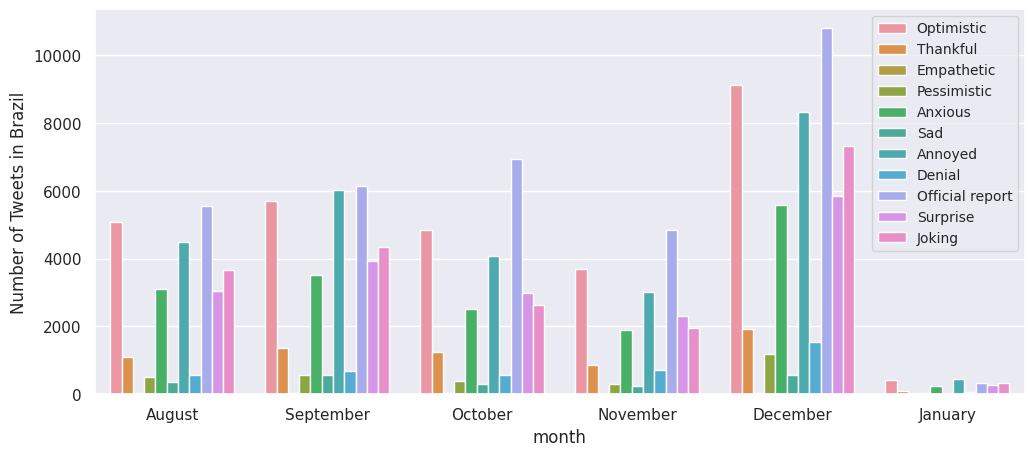

In [ ]:
plt.figure(figsize = (12, 5))
sns.set(font_scale = 1)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = in_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper right', fontsize = 10)
g.set_ylabel('Number of Tweets in Brazil')

In [ ]:
feb_in, mar_in, apr_in, may_in, jun_in, jul_in = get_lists2(data[data['country']=='Australia'])
in_df = monthwise2(feb_in, mar_in, apr_in, may_in, jun_in, jul_in)

Text(0, 0.5, 'Number of Tweets in Australia')

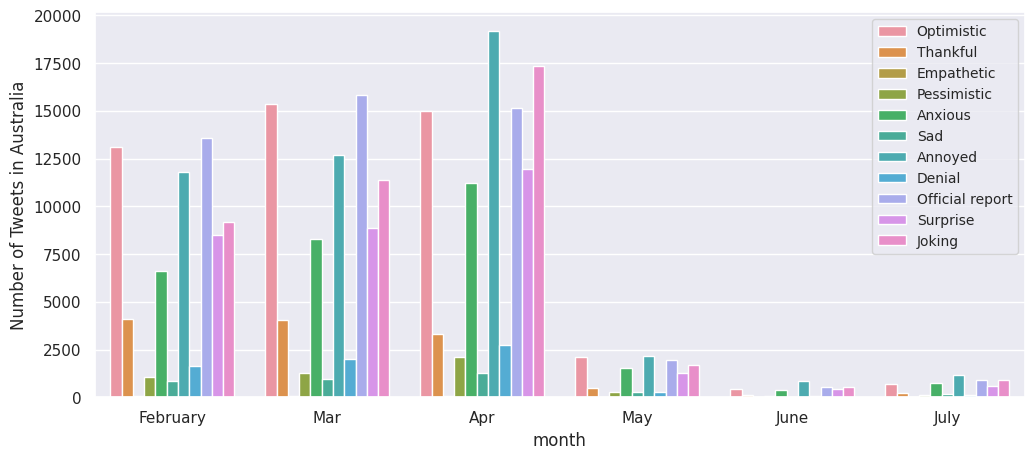

In [ ]:
plt.figure(figsize = (12, 5))
sns.set(font_scale = 1)
g = sns.barplot(x = 'month', y = 'value', hue = 'index', data = in_df.reset_index().melt(id_vars = 'index', var_name = 'month'))
g.legend(loc = 'upper right', fontsize = 10)
g.set_ylabel('Number of Tweets in Australia')

**Finding polarity scores**

Here , weights are assigned to each sentiment manually according to there polarities.

In [ ]:
df[labels]  = df[labels].mul({'Optimistic':2,'Thankful':3, 'Empathetic':0, 'Pessimistic':-4, 'Anxious':-2, 'Sad':-3, 'Annoyed':-1, 'Denial':-5, 'Official report':0,'Surprise':0,'Joking':1})

In [ ]:
score = df[labels].sum(axis=1)
score

0         0
1        -1
2        -3
3        -1
4        -6
         ..
988142    2
988143    0
988144    5
988145    5
988146    5
Length: 988147, dtype: int64

In [ ]:
score = score/11  # Normalizing score to make it between -1 to 1
score

0         0.000000
1        -0.090909
2        -0.272727
3        -0.090909
4        -0.545455
            ...   
988142    0.181818
988143    0.000000
988144    0.454545
988145    0.454545
988146    0.454545
Length: 988147, dtype: float64

In [ ]:
data['polarity_score'] = score
data.head()

,Tweet,text,date,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking,country,polarity_score
0,i just cannot imagine selfish antivaxxers r...,@Gr3yJ3d1 @420_BTC @newscomauHQ I just can’t i...,Wed Dec 08 05:13:37 +0000 2021,0,0,0,0,0,0,1,0,0,0,1,Australia,0.000000
1,rt oh wow so antivaxxers in melbourne are pr...,RT @krunchymoses: Oh wow. So antivaxxers in Me...,Wed Dec 08 05:27:06 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia,-0.090909
2,i think boosters at 3 months might be better f...,I think boosters at 3 months might be better f...,Wed Dec 08 05:35:48 +0000 2021,0,0,0,0,1,0,1,0,0,1,0,Australia,-0.272727
3,psa this is your regular reminder that anyth...,#PSA: This is your regular reminder that anyth...,Wed Dec 08 05:37:09 +0000 2021,0,0,0,0,0,0,1,0,0,0,0,Australia,-0.090909
4,rt canada’s antimaskers antivaxxers are not a...,RT @MatthewSloly: Canada’s antimaskers/antivax...,Wed Dec 08 05:48:35 +0000 2021,0,0,0,0,0,0,1,1,0,0,0,Australia,-0.545455


In [ ]:
poles = data['polarity_score'].unique()  # by various combinations of sentiments there would be some unique polarity scores
poles

array([ 0.        , -0.09090909, -0.27272727, -0.54545455,  0.09090909,
       -0.45454545,  0.18181818, -0.36363636, -0.18181818, -0.72727273,
        0.27272727,  0.45454545,  0.54545455,  0.36363636, -0.90909091,
       -0.63636364, -0.81818182, -1.        , -1.09090909])

In [ ]:
countries = ['India','Australia','Japan','Brazil','Indonesia']
pole_data = pd.DataFrame(columns=countries)
for pole in poles :
  counts = []
  for country in countries:
    count = data['Tweet'][data['country']==country][data['polarity_score']==pole].count()
    counts.append(count)
  pole_data.loc[pole] = counts


In [ ]:
pole_data

,India,Australia,Japan,Brazil,Indonesia
0.000000,41804,131050,34239,48232,8806
-0.090909,27392,90144,17272,20940,2986
-0.272727,7990,24653,4516,5299,800
-0.545455,5216,16946,3345,4347,630
0.090909,8478,54656,12022,17253,2986
-0.454545,3248,14112,3004,3467,626
0.181818,26405,70731,17168,26743,4755
-0.363636,2530,8511,1816,2102,330
-0.181818,13188,40969,9109,10874,1799
-0.727273,99,315,74,65,6


**Variation of counts of different polarity scores**

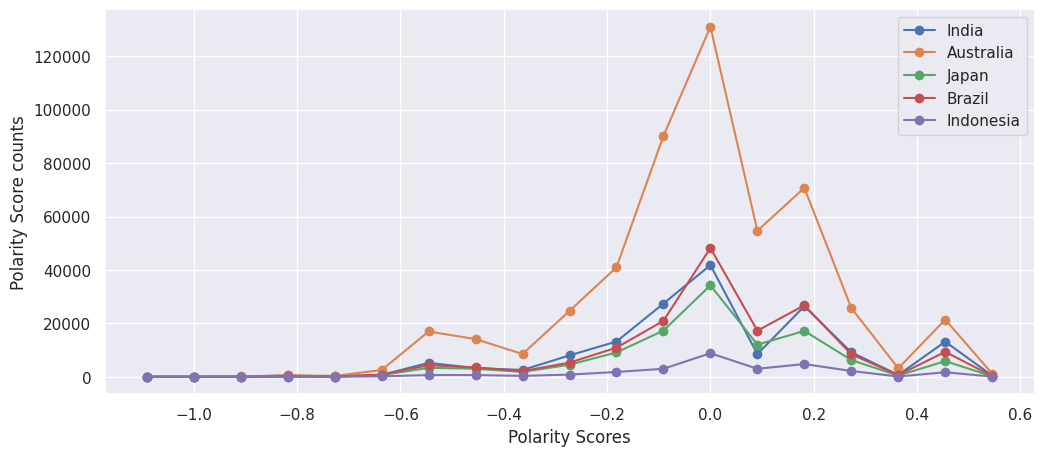

In [ ]:
countries = ['India','Australia','Brazil','Indonesia','Japan']


# Create separate DataFrames for each country
df1 = pd.DataFrame({'Values': pole_data.index, 'Counts': pole_data['India']})
df2 = pd.DataFrame({'Values': pole_data.index, 'Counts': pole_data['Australia']})
df3 = pd.DataFrame({'Values': pole_data.index, 'Counts': pole_data['Japan']})
df4 = pd.DataFrame({'Values': pole_data.index, 'Counts': pole_data['Brazil']})
df5 = pd.DataFrame({'Values': pole_data.index, 'Counts': pole_data['Indonesia']})

# Sort the DataFrames by 'Values' column in ascending order
df1.sort_values('Values', inplace=True)
df2.sort_values('Values', inplace=True)
df3.sort_values('Values', inplace=True)
df4.sort_values('Values', inplace=True)
df5.sort_values('Values', inplace=True)

plt.figure(figsize=(12,5))
# Plot each line separately with different colors
plt.plot(df1['Values'], df1['Counts'], marker='o', label='India')
plt.plot(df2['Values'], df2['Counts'], marker='o', label='Australia')
plt.plot(df3['Values'], df3['Counts'], marker='o', label='Japan')
plt.plot(df4['Values'], df4['Counts'], marker='o', label='Brazil')
plt.plot(df5['Values'], df5['Counts'], marker='o', label='Indonesia')

# Set plot labels and title
plt.ylabel('Polarity Score counts')
plt.xlabel('Polarity Scores')
#plt.title('Polarity Scores for 5 Countries')

# Display a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
data.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking', 'country', 'polarity_score'],
      dtype='object')

**Counts of tweets that contain given sentiment**

Text(0.5, 0, 'Count')

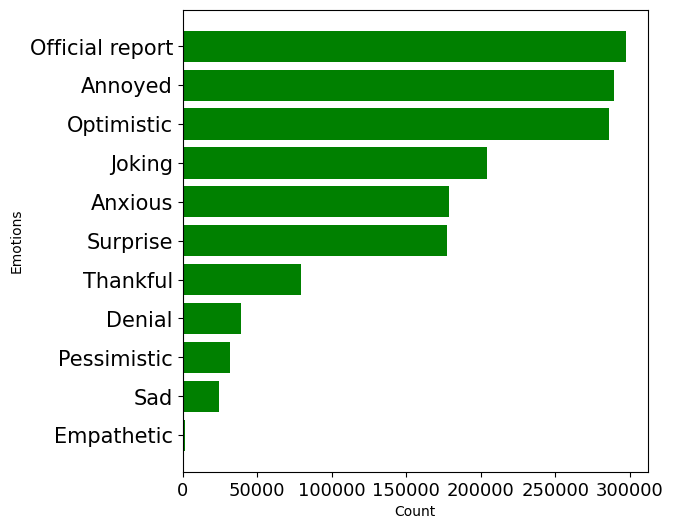

In [ ]:
emotions = list(data.columns[3:14])
scores = [sum(data[x]) for x in emotions]
pairs = []

for i in range(len(emotions)):
    pairs.append((emotions[i], scores[i]))

pairs = sorted(pairs, key = lambda x : x[1], reverse = False)
emotions_sorted = []
scores_sorted = []

for pair in pairs:
    emotions_sorted.append(pair[0])
    scores_sorted.append(pair[1])

fig = plt.figure(figsize = (6, 6))
plt.barh(emotions_sorted, scores_sorted, color = 'green')
plt.yticks(fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Emotions")
plt.xlabel("Count")

In [ ]:
data.iloc[:,3:14].sum().astype(int)

Optimistic         286013
Thankful            79552
Empathetic           1735
Pessimistic         31453
Anxious            178715
Sad                 24632
Annoyed            289645
Denial              38910
Official report    297177
Surprise           177495
Joking             204202
dtype: int64

**Counts of labels of tweets**

<ipython-input-35-33ce72c25f43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \


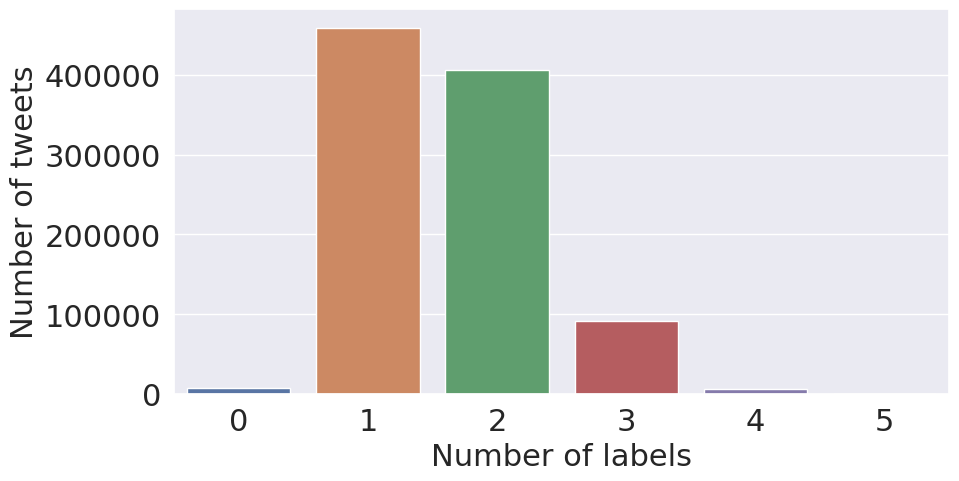

In [ ]:
data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \
                        data['Official report'] + data['Surprise'] + data['Joking']
rowSums = data['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (10, 5))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
multi_label_total = {}
for value in data["n_emotions"].unique():
    multi_label_total[value] = data["n_emotions"].value_counts()[value]
multi_label_total

{2: 405845, 1: 458820, 3: 91441, 4: 6329, 0: 7884, 5: 94}

**WordCloud**

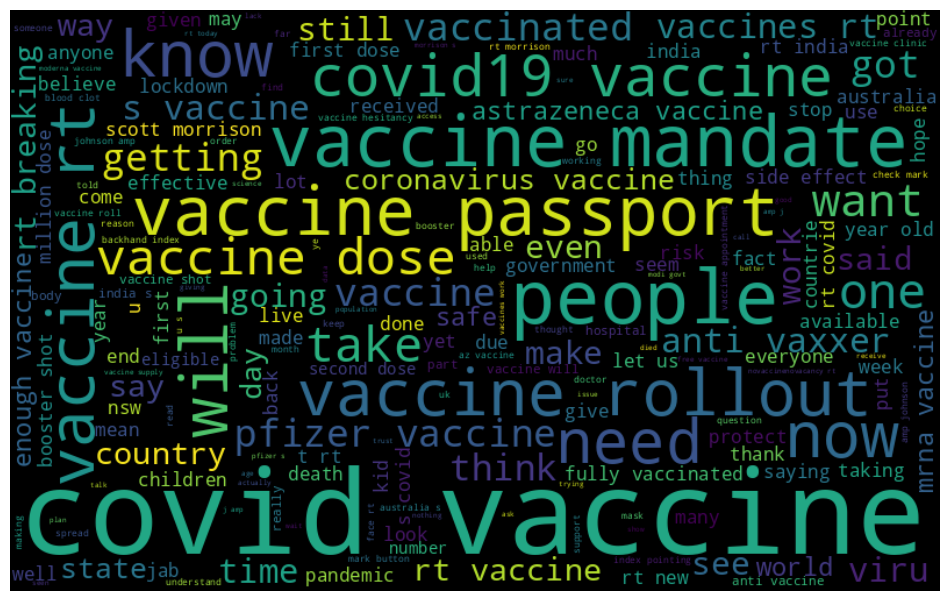

In [ ]:
from wordcloud import WordCloud
MostUsedWords = " ".join([word for word in data['Tweet']])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(MostUsedWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**cleaning and preprocessing of tweets**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata

In [ ]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [ ]:
data['Tweet'] # processed tweets

0            i just cannot imagine selfish antivaxxers r...
1         rt  oh wow  so antivaxxers in melbourne are pr...
2         i think boosters at 3 months might be better f...
3          psa  this is your regular reminder that anyth...
4         rt  canada’s antimaskers antivaxxers are not a...
                                ...                        
988142    rt  in 2021   is calling for a global effort t...
988143    rt   dyk respiratory syncytial virus  or  rsv ...
988144    rt  during orldimmunizationweek  our head of g...
988145    rt  during orldimmunizationweek  our head of g...
988146    rt   ceo paul hudson on collaboration with  to...
Name: Tweet, Length: 988147, dtype: object

**Getting Unigrams, bigram and trigram plots**

In [ ]:
import re
df = data['Tweet'][data["country"]=="India"][data["polarity_score"] >= -0.2][data["polarity_score"] <= 0.2]
words = clean(''.join(df.tolist()))

Text(0.5, 1.0, 'Unigrams')

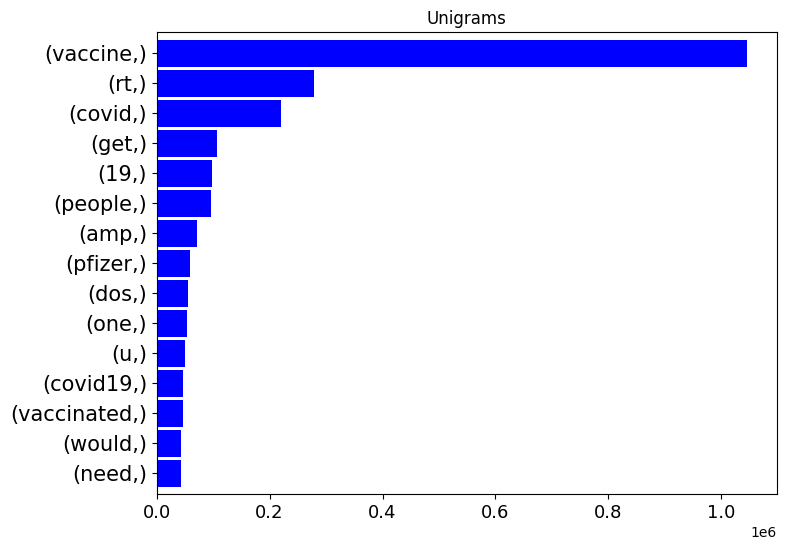

In [ ]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:15]

unigrams_series.sort_values().plot.barh(color = 'blue', width = 0.9, figsize = (8, 6))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.title("Unigrams")

Text(0.5, 1.0, 'Bigram for neutral sentiments of Tweets belonging to India')

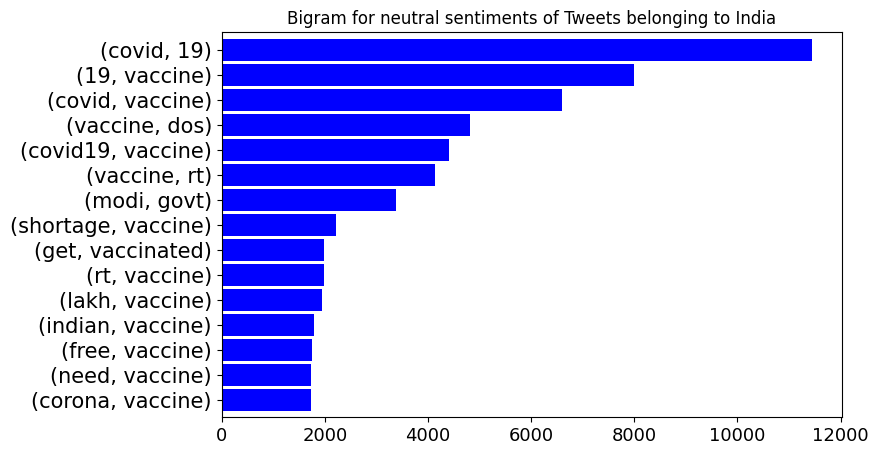

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'blue', width = 0.9, figsize = (8, 5))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.title("Bigram for neutral sentiments of Tweets belonging to India")

Text(0.5, 1.0, 'Trigram for neutral sentiments of Tweets belonging to India')

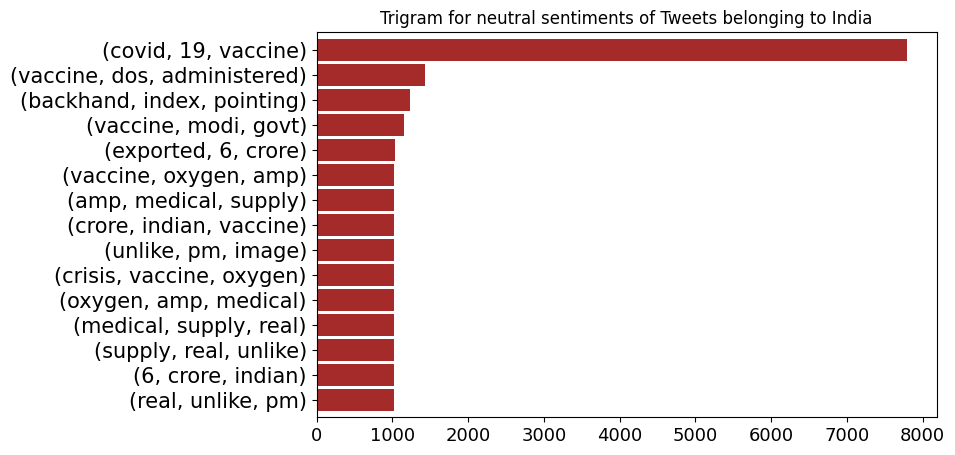

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'brown', width = 0.9, figsize = (8, 5))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.title("Trigram for neutral sentiments of Tweets belonging to India")

**Percentage distribution of sentiments in all countries**

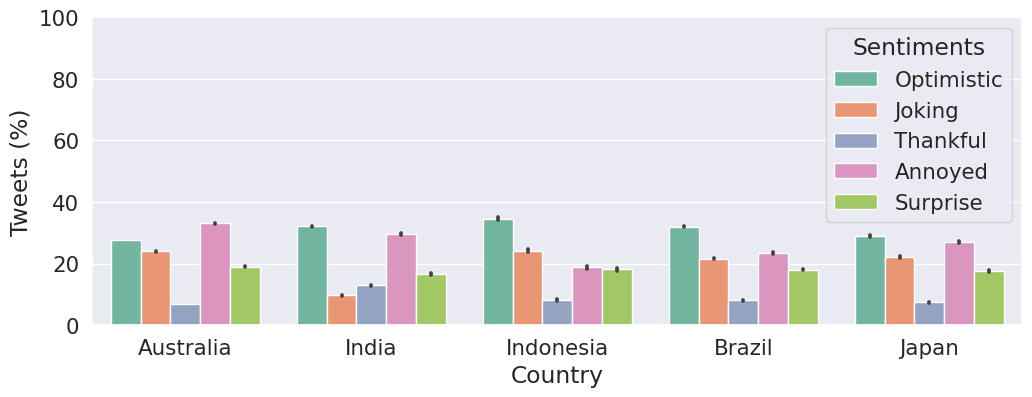

In [ ]:
plt.figure(figsize = (12, 4))
sns.set(font_scale=1.4)
melted_data = pd.melt(data, id_vars='country', value_vars=['Optimistic', 'Joking', 'Thankful','Annoyed','Surprise'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments',data=melted_data, palette='Set2')
plt.ylabel('Tweets (%)')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.show()


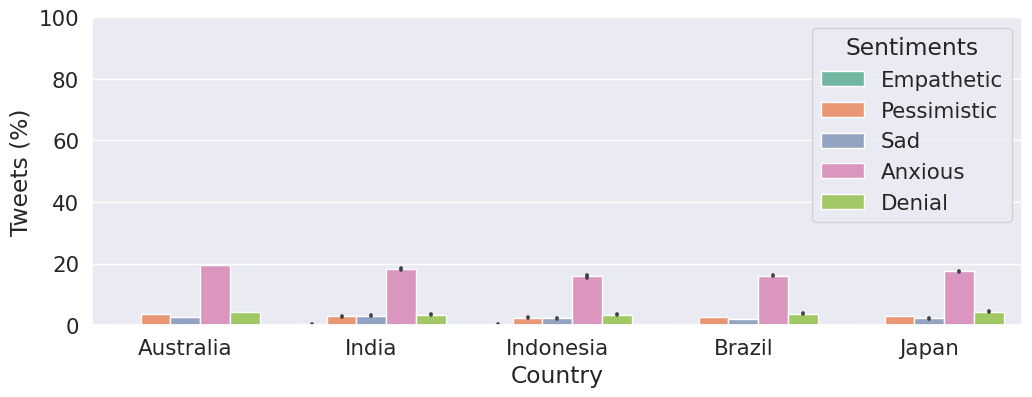

In [ ]:
plt.figure(figsize = (12, 4))
sns.set(font_scale=1.4)
melted_data = pd.melt(data, id_vars='country', value_vars=['Empathetic', 'Pessimistic', 'Sad','Anxious','Denial'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments', data=melted_data, palette='Set2')
plt.ylabel('Tweets (%)')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.show()


In [ ]:
plt.figure(figsize = (8, 4))
sns.barplot(x=data['country'],y= data*100)
plt.show()

**Polarity score distribution plot**

<ipython-input-47-4c2b5edad879>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['polarity_score'], hist=True)


<Axes: xlabel='polarity_score', ylabel='Density'>

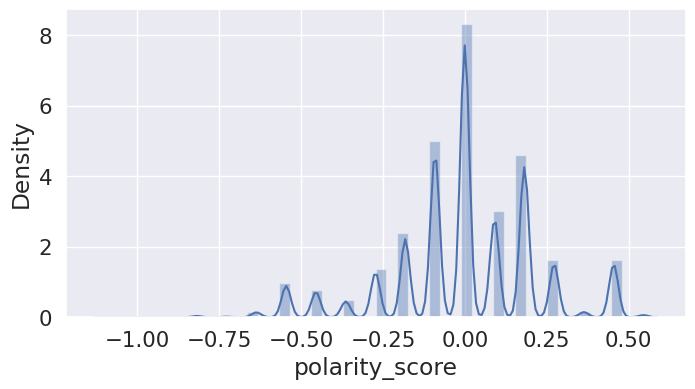

In [ ]:
plt.figure(figsize = (8, 4))
sns.distplot(data['polarity_score'], hist=True)

**Box plot of polarity scores for all 5 countries**

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”)


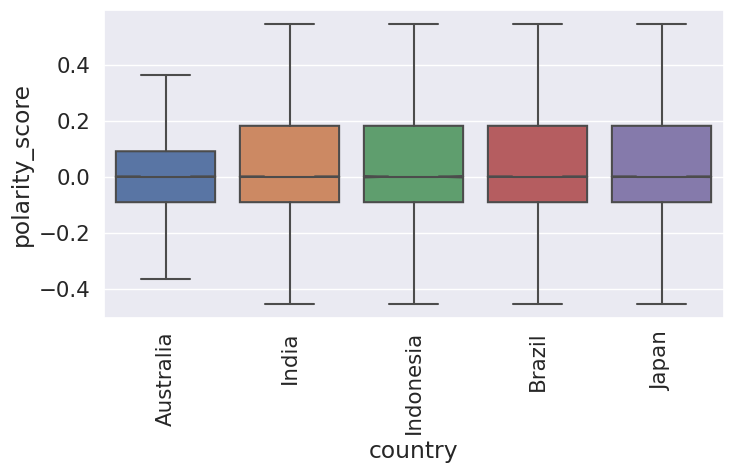

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='country', y='polarity_score', notch = True,
            data=data, showfliers=False)
#plt.xlabel('contry')
#plt.ylabel('polarity Score')
plt.xticks(rotation=90)
print("A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”)")

**violin plot of Polarity scores for all 5 countries**

<Axes: xlabel='country', ylabel='polarity_score'>

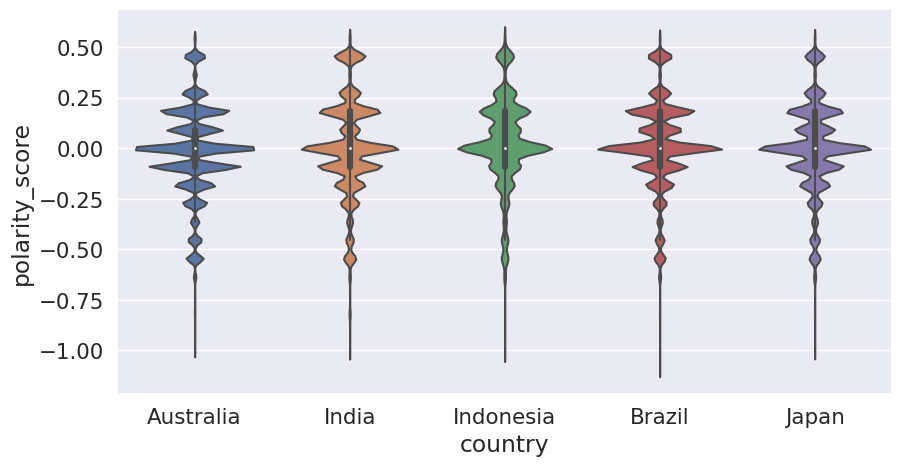

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='country',y='polarity_score')

**Plot to analyze Variation of Mean of polarity score over the months**

In [ ]:
# Group the DataFrame by month, country, and sentiment and calculate the mean polarity score for each group
grouped = data.groupby(['month', 'country'])['polarity_score'].mean().reset_index()

# Rename the columns
grouped.columns = ['Month', 'Country', 'Mean Polarity']

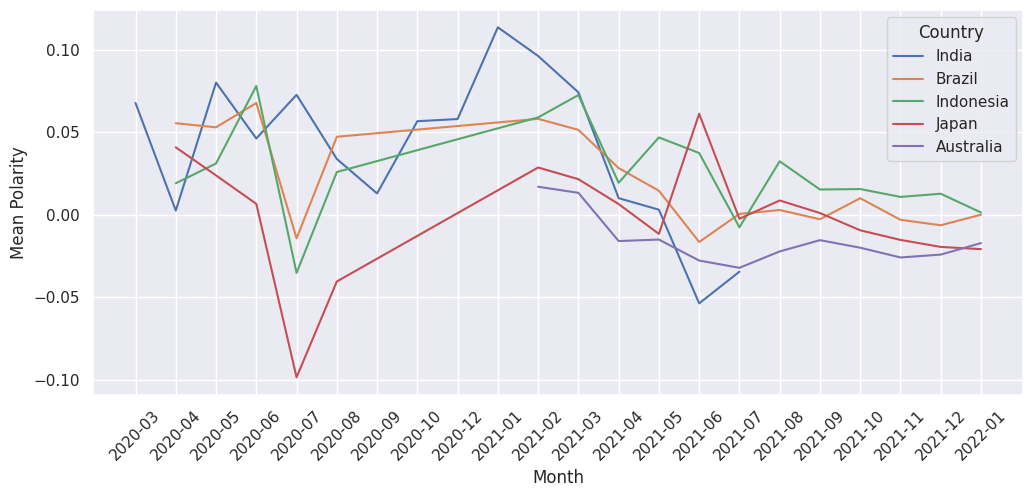

In [ ]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Mean Polarity", hue="Country", data=grouped)
plt.xticks(rotation=45)
plt.show()

**Plot to analyze Variation of Mean of TextBlob polarity score over the months**

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
df = df.dropna(subset=['date'])
df['date'] = df['date'].dt.tz_localize('UTC').dt.tz_convert(None)
df['month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')

In [ ]:
df.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Surprise', 'Joking', 'country', 'TextBlob_Polarity', 'month'],
      dtype='object')

In [ ]:
TB_pol = df.groupby(['month', 'country'])['TextBlob_Polarity'].mean().reset_index()

# Rename the columns
TB_pol.columns = ['Month', 'Country', 'Mean of TextBlob Polarity']

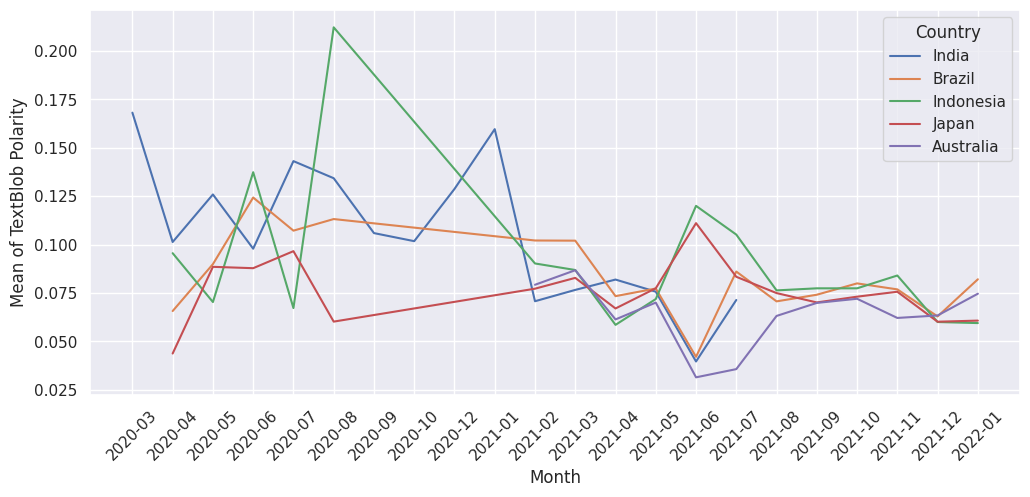

In [ ]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Mean of TextBlob Polarity", hue="Country", data=TB_pol)
plt.xticks(rotation=45)
plt.show()

**Plot to analyze Variation of Standard deviation of polarity score over the months**

In [ ]:
new = data.groupby(['month', 'country'])['polarity_score'].std().reset_index()

# Rename the columns
new.columns = ['Month', 'Country', 'Standard deviation of Polarity']

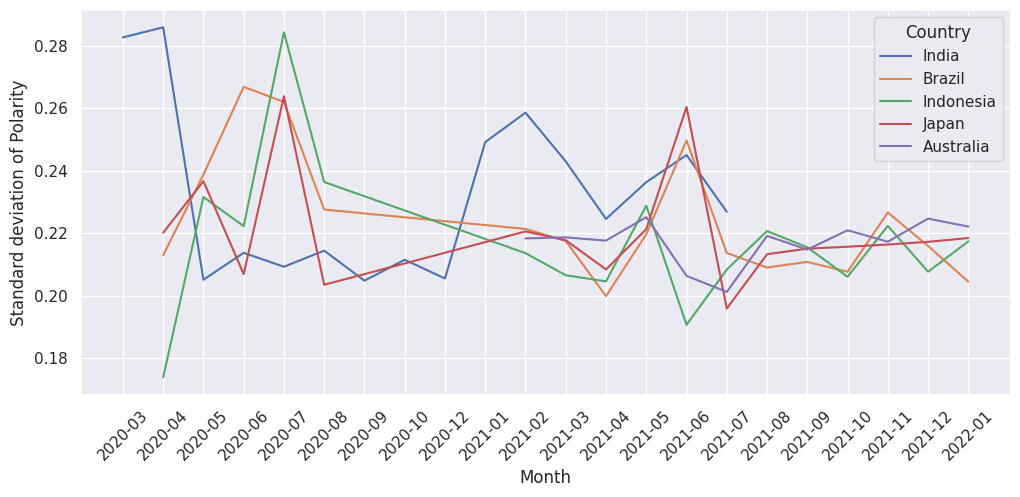

In [ ]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Standard deviation of Polarity", hue="Country", data=new)
plt.xticks(rotation=45)
plt.show()

In [ ]:
emotions = list(data.columns[3:14])
only_emotes = data[emotions]
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Surprise,Joking
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
988138,1,0,0,0,0,0,0,0,1,0,0
988139,0,1,0,0,0,0,0,0,1,0,0
988140,0,0,0,0,0,0,0,0,1,0,0
988144,1,1,0,0,0,0,0,0,0,0,0


**Plotting of Heatmap of sentiments**

In [ ]:
emote_array = np.zeros((11, 11))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5, 'Annoyed' : 6, 'Denial' : 7, 'Official report' : 8,
    'Surprise' : 9, 'Joking' : 10
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(11):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 11):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)

<Axes: >

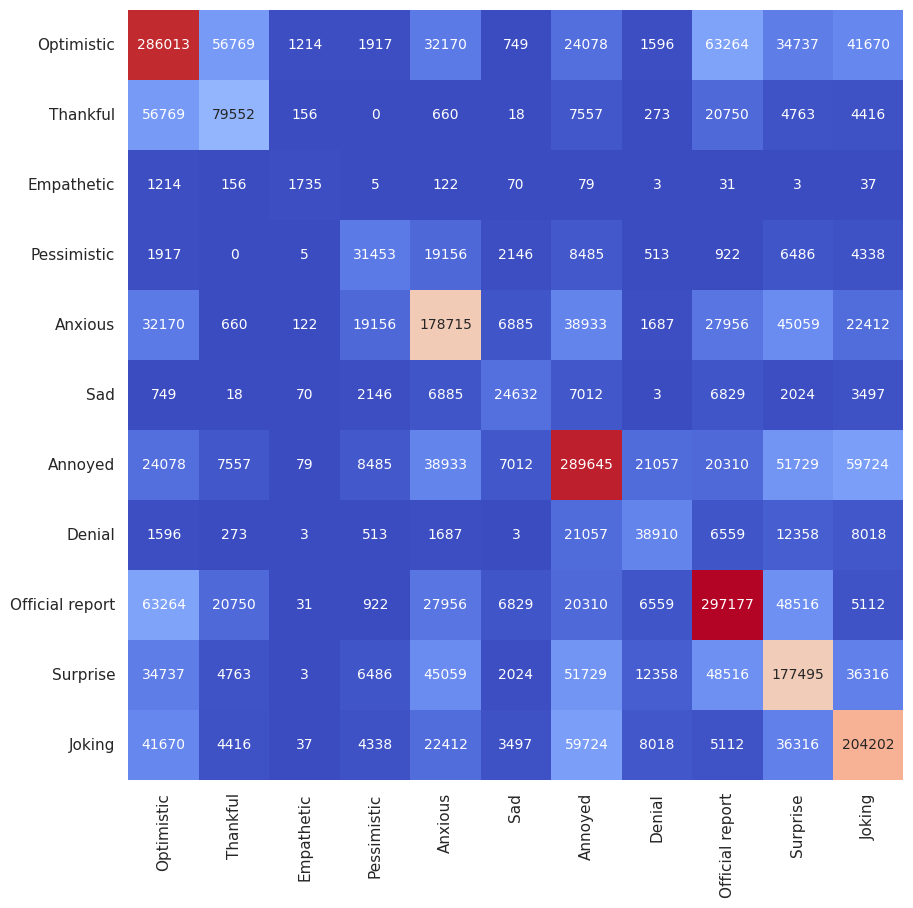

In [ ]:
fig = plt.figure(figsize = (10, 10))
sns.set(font_scale = 1)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns,
            fmt = 'g', annot_kws = {"size" : 10}, cbar = False, cbar_kws = {"shrink": .8})


**Tweet counts variation over months**

In [ ]:
grouped = data.groupby(['month', 'country'])['Tweet'].count().reset_index()
grouped.columns = ['Month', 'Country', 'Number of Tweets']

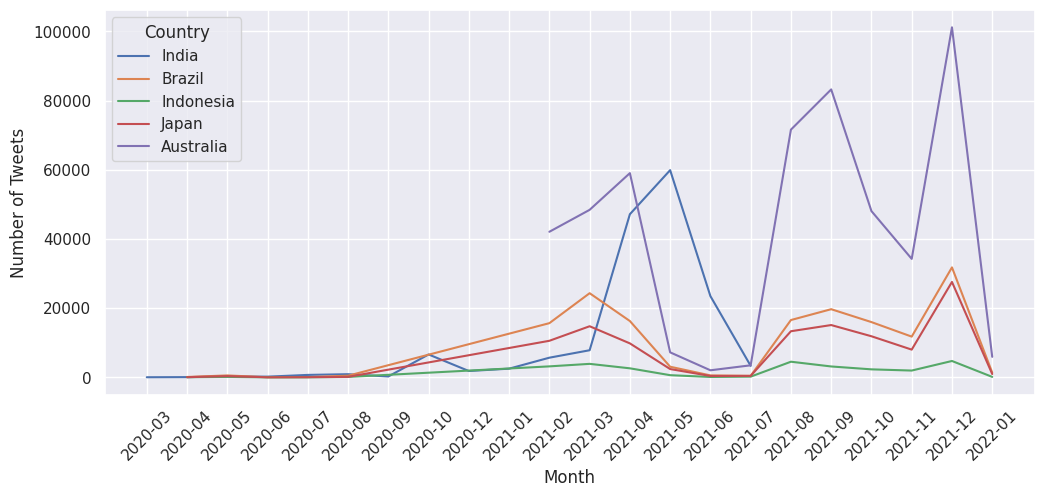

In [ ]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Number of Tweets", hue="Country", data=grouped)
plt.xticks(rotation=45)
plt.show()

**Cumulative plot of COVID Cases counts over months**

In [ ]:
countries = ['India', 'Australia', 'Indonesia', 'Japan', 'Brazil']
# this data of covid cases is obtained from website "https://www.worldometers.info/coronavirus/country"

data = {
    'India': [3,1998,39699,207191,605220,1804702,3848968,6391960,8229322,9533471,10324631,10778206,11123619,12302110,19919715,28440988,30453937,31725399,32902345,33789398,34295381,34615757,34922882,41803318],
    'Australia': [29,5244,6679,7133,7827,17064,25592,26749,27255,27565,28121,28475,28636,28984,29463,29781,30293,34210,55873,107926,170933,208918,456879,2527122],
    'Indonesia': [0,1790,10551,27549,57770,111455,180646,291182,415402,543975,758473,1099687,1347026,1534255,1677274,1831773,2228938,3462800,4100138,4220206,4244761,4256998,4263168,4369391],
    'Japan': [256,2385,14603,16964,18757,36765,69152,83748,101372,150731,238569,392553,433797,475901,598680,750948,803625,938672,1510072,1705466,1722880,1727430,1734292,2811050],
    'Brazil': [2,6918,97096,559771,1551965,2748948,4023777,4876320,5576685,6472608,7759867,9342932,10657517,12926819,14853980,16837143,18759785,20040368,20968754,21445651,21814693,22118782,22293228,25813685]
}


In [ ]:
df = pd.DataFrame(data)
df['month'] = ['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02']

In [ ]:
df.index = pd.to_datetime(df['month'])

In [ ]:
df.index

DatetimeIndex(['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01'],
              dtype='datetime64[ns]', name='month', freq=None)

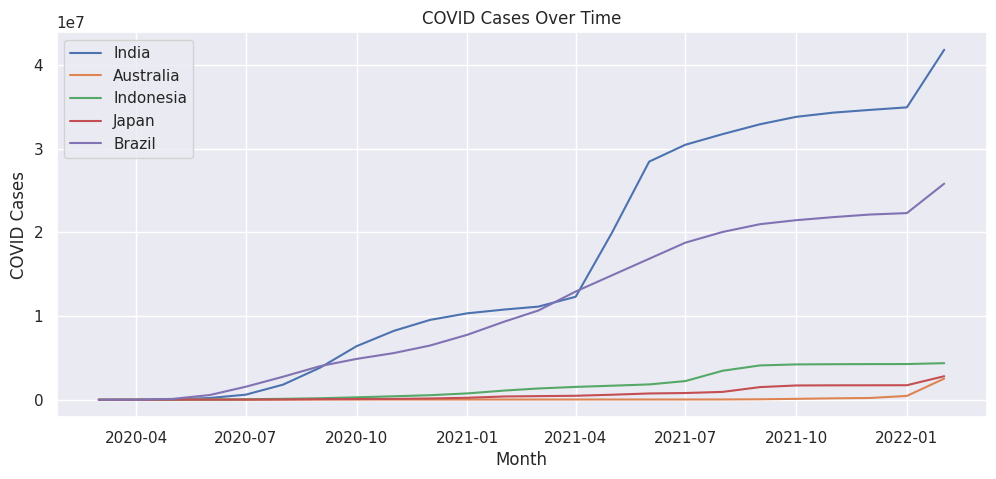

In [ ]:
plt.figure(figsize=(12, 5))
for country in countries:
    plt.plot(df.index, df[country], label=country)
plt.xlabel('Month')
plt.ylabel('COVID Cases')
plt.title('COVID Cases Over Time')
plt.legend()
plt.show()


**plot of Monthly COVID Cases counts over months**

In [ ]:

countries = ['India', 'Australia', 'Indonesia', 'Japan', 'Brazil']

DATA = {
    'India':[3,1995,37701,167492,398029,1199482,2044266,2542992,1837362,1304149,791160,453575,345413,1178491,7617605,8521273,2012949,1271462,1176946,887053,505983,320376,307125],
    'Australia':[29,5215,1435,454,694,9237,8528,1157,506,310,556,354,161,348,479,318,512,3917,21663,52053,63007,37985,247961],
    'Indonesia':[0,1790,8761,16998,30221,53685,69191,110536,124220,128573,214498,341214,247339,187229,143019,154499,397165,1233862,637338,120068,24555,12237,6170],
    'Japan': [256,2129,12218,2361,1793,18008,32387,14596,17624,49359,87838,153984,41244,42104,122779,152268,52677,135047,571400,195394,17414,4550,6862],
    'Brazil': [2,6916,90178,462675,992194,1196983,1274829,852543,700365,895923,1287259,1583065,1314585,2269302,1927161,1983163,1922642,1280583,928386,476897,369042,304089,174446]
}

In [ ]:
DF = pd.DataFrame(DATA)
DF['month'] = ['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01']

In [ ]:
DF.index = pd.to_datetime(DF['month'])

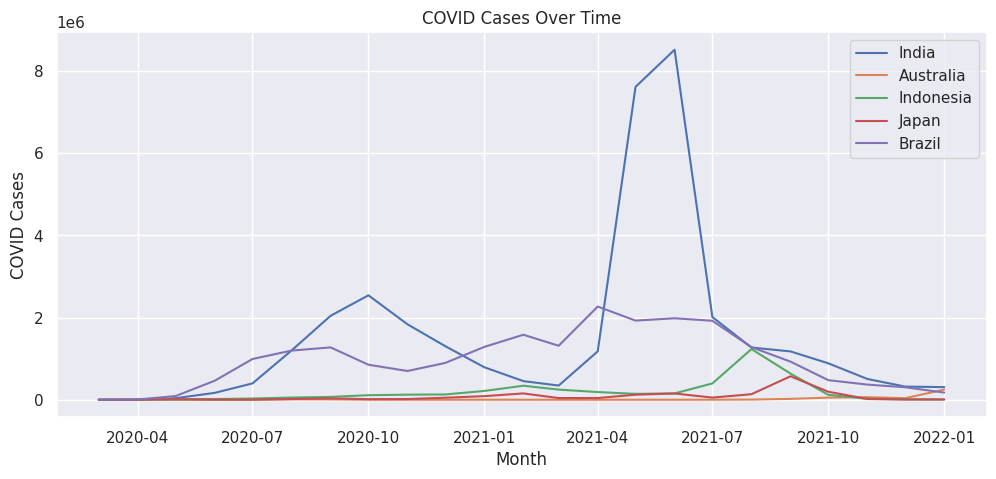

In [ ]:
plt.figure(figsize=(12, 5))
for country in countries:
    plt.plot(DF.index, DF[country], label=country)
plt.xlabel('Month')
plt.ylabel('COVID Cases')
plt.title('COVID Cases Over Time')
plt.legend()
plt.show()


**Plotting all possible combinations of sentiments which results in negative polarity scores**

Similarly can be done to plot for neutral and posititve

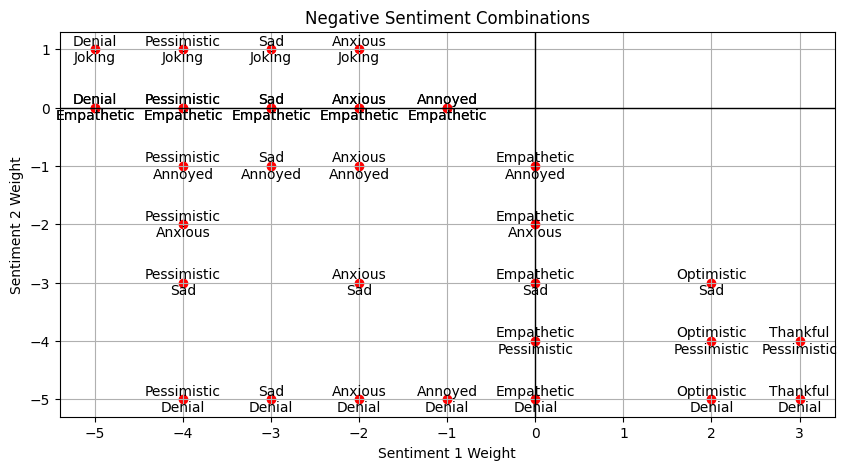

In [ ]:
import matplotlib.pyplot as plt
import itertools

# Define the sentiment weights and names
sentiment_weights = [2, 3, 0, -4, -2, -3, -1, -5, 0, 0, 1]
sentiment_names =['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic',
       'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report', 'Surprise',
       'Joking']

# Generate all possible combinations of sentiments
combinations = list(itertools.combinations(sentiment_weights, 2))

# Calculate the sentiment scores for each combination
sentiment_scores = [(weight_1 + weight_2) / 11 for weight_1, weight_2 in combinations]

# Separate the combinations based on sentiment scores
negative_combinations = [combo for combo, score in zip(combinations, sentiment_scores) if score < 0]

# Extract the weights and names for each sentiment in negative combinations
negative_weights_1 = [weight_1 for weight_1, _ in negative_combinations]
negative_weights_2 = [weight_2 for _, weight_2 in negative_combinations]
negative_sentiments_1 = [sentiment_names[sentiment_weights.index(weight_1)] for weight_1, _ in negative_combinations]
negative_sentiments_2 = [sentiment_names[sentiment_weights.index(weight_2)] for _, weight_2 in negative_combinations]

# Plotting the scatter plot with sentiment labels
plt.figure(figsize=(10, 5))
plt.scatter(negative_weights_1, negative_weights_2, color='red')

for i in range(len(negative_combinations)):
    plt.text(negative_weights_1[i], negative_weights_2[i], f'{negative_sentiments_1[i]}\n{negative_sentiments_2[i]}', ha='center', va='center')

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Sentiment 1 Weight')
plt.ylabel('Sentiment 2 Weight')
plt.title('Negative Sentiment Combinations')
plt.grid(True)
plt.show()


**Plot to visualize weights of sentiments**

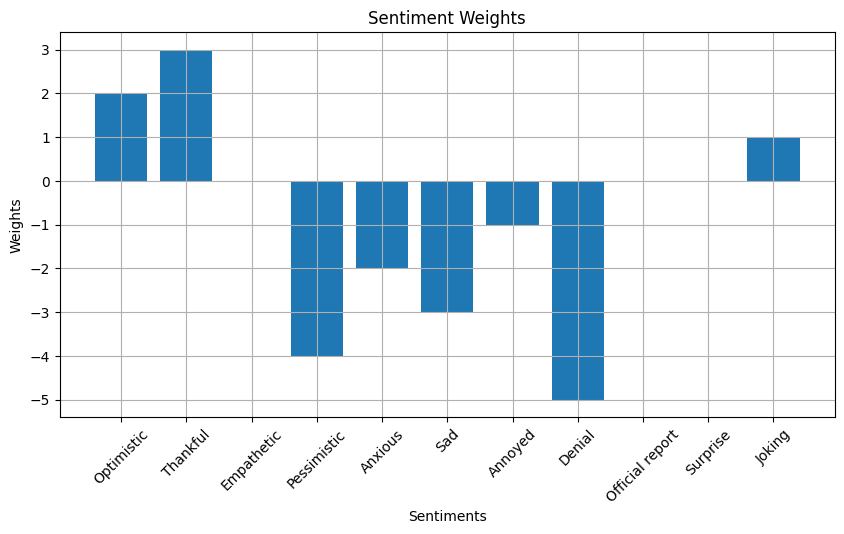

In [ ]:
import matplotlib.pyplot as plt

sentiments = {
    'Optimistic': 2,
    'Thankful': 3,
    'Empathetic': 0,
    'Pessimistic': -4,
    'Anxious': -2,
    'Sad': -3,
    'Annoyed': -1,
    'Denial': -5,
    'Official report': 0,
    'Surprise': 0,
    'Joking': 1
}

# Extract sentiment names and weights
sentiment_names = list(sentiments.keys())
sentiment_weights = list(sentiments.values())

# Plotting the bar plot
plt.figure(figsize=(10, 5))
plt.bar(sentiment_names, sentiment_weights)
plt.xlabel('Sentiments')
plt.ylabel('Weights')
plt.title('Sentiment Weights')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
